# Exercise 5. Regularization in Linear Regession, and Bias-Variance Tradeoff
(with Matlab, from scratch)
In this exercise, you will implement regularized linear regression and use it to study models with different bias-variance properties.
- Going through this exercise, as guided by ex5.m
 
Files included for this exercise:  
- ex5.m - Octave/MATLAB script that steps you through the exercise
- ex5data1.mat - Dataset
- submit.m - Submission script that sends your solutions to our servers
- featureNormalize.m - Feature normalization function
- fmincg.m - Function minimization routine (similar to fminunc)
- plotFit.m - Plot a polynomial fit
- trainLinearReg.m - Trains linear regression using your cost function
- [ ] linearRegCostFunction.m - Regularized linear regression cost function
- [ ] learningCurve.m - Generates a learning curve
- [ ] polyFeatures.m - Maps data into polynomial feature space
- [ ] validationCurve.m - Generates a cross validation curve


### Section 1.1. Visualizing the dataset
This dataset is divided into three parts:  
- A training set that your model will learn on: X, y
- A cross validation set for determining the regularization parameter:
Xval, yval
- A test set for evaluating performance. These are "unseen" examples
which your model did not see during training: Xtest, ytest

In [1]:
%plot inline
opengl hardware

In [2]:
% Importing
data = load('ex5data1.mat');
X = data.X;
y = data.y;
Xtest = data.Xtest;
ytest = data.ytest;
Xval = data.Xval;
yval = data.yval;


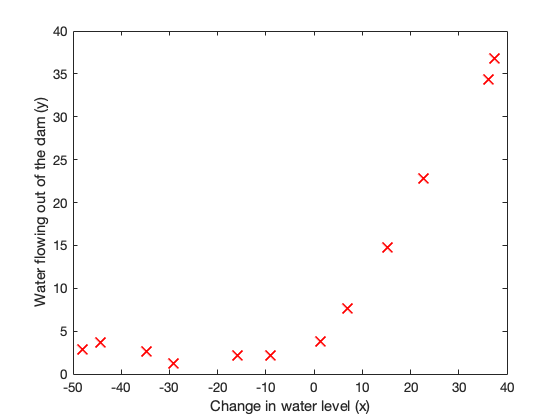

In [3]:
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

### Section 1.2. Regularized linear regression cost function

Recall that the cost function and gradient are:  
  
  
- [x] Write the cost function and partial derivative for $\theta$, Edit __linearRegCostFunction.m__  

In [4]:
% Test using theta=[1;1]

theta = [1;1];
m = size(X,1);

[J,grad] = linearRegCostFunction([ones(m,1) X], y, theta,1);
fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);
fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)
Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


### Section 1.3. Fitting Linear Regression  
In this part, we set regularization parameter $\theta$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension.  
The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model.  
- [x] Training LR model on the dataset using function in __trainLinearReg.m__, which finds theta parameters
- [x] Plot the best fit line on the dataset 

Iteration    12 | Cost: 2.237391e+01



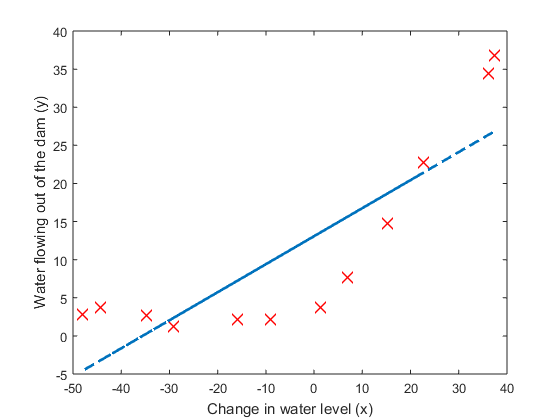

In [36]:
% Training with lambda = 0
lambda = 0; 
[theta ] = trainLinearReg([ones(m,1) X], y,lambda);

% Plot data and best fit line
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2); 
hold off;

### Section 2. Bias-Variance  
Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.  

### Section 2.1. Learning Curves
You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size. 
- [x] Edit __learningCurve.m__, so that it returns a vector of errors for the training set and cross validation set.  
- [x] Split X into training and cross-validation sets 
- [x] Find theta parameters using __trainLinearReg.m__ 
- [x] Compute error on the training and cross validation sets, using __linearRegCostFunction.m__ with lambda =0 (no regularization). Then, Store them into _errortrain_ and _errorval_
- [x] plot the learning curve, using training- and cross-validation set errors.  


In [37]:
lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);
                  
                  

Iteration     3 | Cost: 0.000000e+00
Iteration     3 | Cost: 9.860761e-32
Iteration     8 | Cost: 3.286595e+00
Iteration    14 | Cost: 2.842678e+00
Iteration    28 | Cost: 1.315405e+01
Iteration    32 | Cost: 1.944396e+01
Iteration    13 | Cost: 2.009852e+01
Iteration    14 | Cost: 1.817286e+01
Iteration     9 | Cost: 2.260941e+01
Iteration    25 | Cost: 2.326146e+01
Iteration    32 | Cost: 2.431725e+01
Iteration    12 | Cost: 2.237391e+01



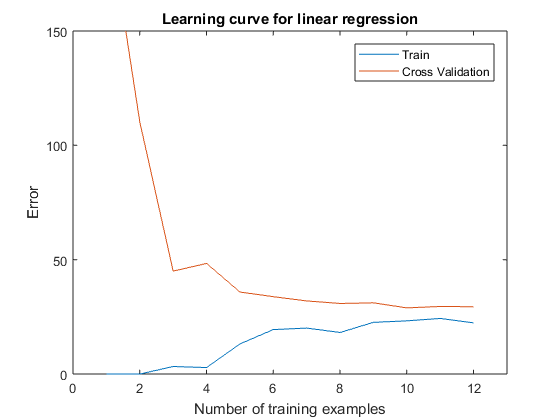

In [38]:
% Plot Learning Curve
plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

In [39]:
% Print out training and cv errors
fprintf('No. Train Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

No. Train Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818



Observation: 
- The train error and cross validation error are high when the number of training examples is increased. This
reflects a high bias problem in the model, i.e., the linear regression model is too simple and is unable to fit the dataset well

### Section 3. Polynomial Regression  
For use of polynomial Regression, the hypothesis has the form: 
$$h_\theta(x) = \theta_0 + \theta_1*(waterLevel) + \theta_2*(waterLevel)^2 + ... + \theta_p*(waterLevel)^p$$
$$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_px_p$$


Notice that by defining x1 = (waterLevel); x2 = (waterLevel)2; ...; xp =(waterLevel)p, we obtain a linear regression model where the features are the various powers of the original value (waterLevel).
- [x] Complete the code in __polyFeatures.m__, so that the function maps original X (mx1) into its higher power

In [40]:
% Testing function and feature Normalizing datasets

p = 8; % degree= 8

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

In [41]:
fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));



Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  



- [x] Plot the training data and best fit line  
- [x] Plot the learning curves

Iteration   200 | Cost: 1.440836e-01
Iteration     3 | Cost: 0.000000e+00
Iteration    14 | Cost: 0.000000e+00
Iteration    24 | Cost: 3.286920e-31
Iteration     8 | Cost: 7.792886e-27
Iteration   200 | Cost: 2.554674e-09
Iteration   200 | Cost: 4.269416e-04
Iteration   200 | Cost: 4.617674e-02
Iteration   200 | Cost: 6.899910e-02
Iteration   200 | Cost: 1.088064e-01
Iteration   200 | Cost: 1.694871e-01
Iteration   200 | Cost: 5.468256e-02
Iteration   200 | Cost: 1.440836e-01
Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121510
  	3		0.000000	61.754825
  	4		0.000000	61.928895
  	5		0.000000	6.599175
  	6		0.000427	10.296482
  	7		0.046177	7.344244
  	8		0.068999	7.128956
  	9		0.108806	11.816659
  	10		0.169487	9.178183
  	11		0.054683	20.303366
  	12		0.144084	18.911245



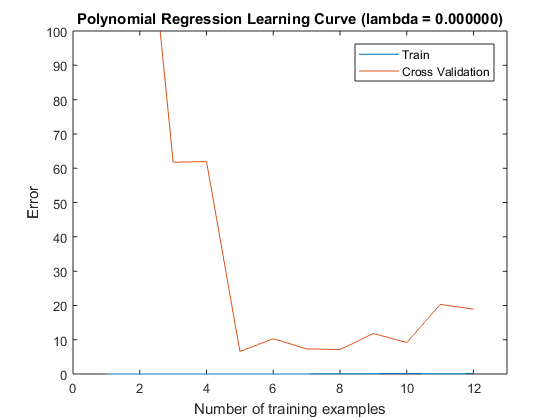

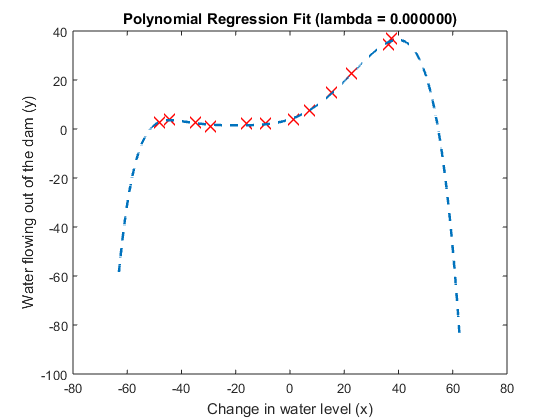

In [42]:
lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end


One way to combat the overfitting (high-variance) problem is to add regularization to the model. In the next section, you will get to try different $\lambda$ parameters to see how regularization can lead to a better model.

### Section 3.2. Adjusting the regularization parameter  
Try to plot diffferent lambdas:__0,1,100__


kk =

     1

Iteration   200 | Cost: 1.440836e-01
Iteration     3 | Cost: 0.000000e+00
Iteration    14 | Cost: 0.000000e+00
Iteration    24 | Cost: 3.286920e-31
Iteration     8 | Cost: 7.792886e-27
Iteration   200 | Cost: 2.554674e-09
Iteration   200 | Cost: 4.269416e-04
Iteration   200 | Cost: 4.617674e-02
Iteration   200 | Cost: 6.899910e-02
Iteration   200 | Cost: 1.088064e-01
Iteration   200 | Cost: 1.694871e-01
Iteration   200 | Cost: 5.468256e-02
Iteration   200 | Cost: 1.440836e-01
(lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121510
  	3		0.000000	61.754825
  	4		0.000000	61.928895
  	5		0.000000	6.599175
  	6		0.000427	10.296482
  	7		0.046177	7.344244
  	8		0.068999	7.128956
  	9		0.108806	11.816659
  	10		0.169487	9.178183
  	11		0.054683	20.303366
  	12		0.144084	18.911245

kk =

     1

Iteration    64 | Cost: 7.268148e+00
Iteration     6 | Cost: 7.543702e-32
Iteration    22 | Cost: 7.269436e-02
I

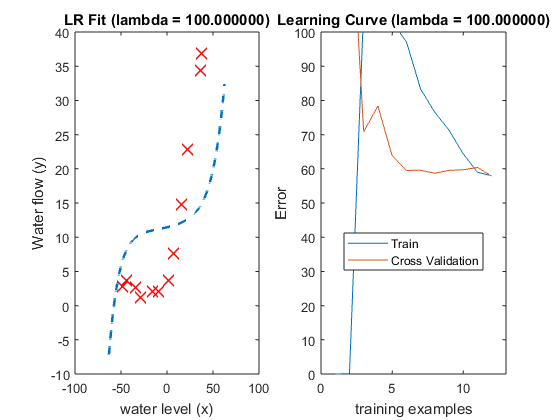

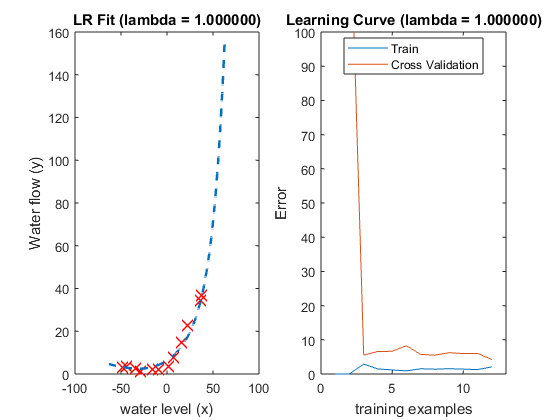

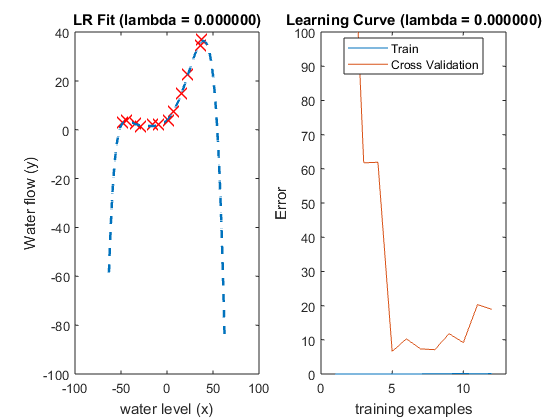

In [46]:
lambda_list = [0, 1, 100];


for jj = 1:3
    kk=1
    [theta] = trainLinearReg(X_poly, y, lambda_list(jj));
    
    figure(jj)
    % Plot training data and fit
    subplot(1,2,kk);
    plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
    plotFit(min(X), max(X), mu, sigma, theta, p);
    xlabel('water level (x)');
    ylabel('Water flow (y)');
    title (sprintf('LR Fit (lambda = %f)', lambda_list(jj)));
    kk = kk + 1; 

    subplot(1,2,kk);
    [error_train, error_val] = ...
        learningCurve(X_poly, y, X_poly_val, yval, lambda_list(jj));
    plot(1:m, error_train, 1:m, error_val);
    kk = kk+1;

    title(sprintf('Learning Curve (lambda = %f)', lambda_list(jj)));
    xlabel('training examples')
    ylabel('Error')
    axis([0 13 0 100])
    legend('Train', 'Cross Validation')
    legend('Location','best')

    fprintf('(lambda = %f)\n\n', lambda_list(jj));
    fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');

    for i = 1:m
        fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
    end
end


- For __$\lambda$ = 1__, you should see a polynomial fit that follows the data trend well and a learning curve showing that both the cross validation and training error converge to a relatively low value. This shows
the $\lambda$ = 1 regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.
- For __$\lambda$ = 100__, you should see a polynomial fit that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data

### Section 3.3. Selecting $\lambda$ using a cross validation set
From the previous parts of the exercise, you observed that the value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set.


Now, implement an automated method to select $\lambda$
- [x] Complete the code in __validationCurve.m__


Iteration   200 | Cost: 1.440836e-01
Iteration   200 | Cost: 1.890052e-01
Iteration   200 | Cost: 2.508212e-01
Iteration   200 | Cost: 3.850697e-01
Iteration   200 | Cost: 6.692749e-01
Iteration   173 | Cost: 1.443470e+00
Iteration    98 | Cost: 3.101591e+00
Iteration    64 | Cost: 7.268148e+00
Iteration    35 | Cost: 1.586769e+01
Iteration    22 | Cost: 3.337220e+01
lambda		Train Error	Validation Error
 0.000000	0.144084	18.911245
 0.001000	0.148232	20.091546
 0.003000	0.179989	17.595899
 0.010000	0.221855	17.049395
 0.030000	0.281858	12.829797
 0.100000	0.459318	7.587013
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260626
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945508



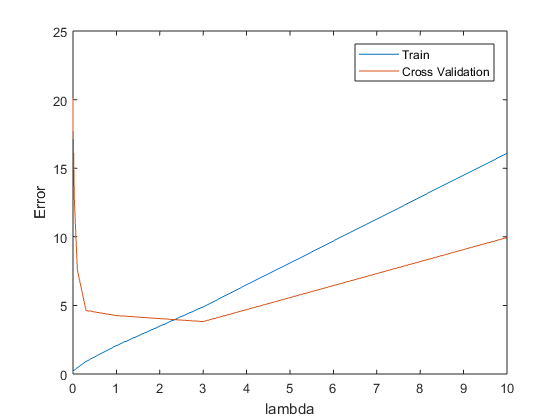

In [47]:
[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
    fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end


- Best lambda to use is 3, as it gives the lowest error

### Section 3.4. Computing test set error

you should compute the test error using the best value of $\lambda$ you found. In our cross validation, we obtained a test error of 3.8599 for $\lambda$ = 3.


In [59]:
[error_train, error_test] = learningCurve(X_poly, y, X_poly_test, ytest, 3);
fprintf('for lambda=3, the test error is: %f', error_test(end));

Iteration   149 | Cost: 0.000000e+00
Iteration     3 | Cost: 9.652732e-02
Iteration    22 | Cost: 4.227606e+01
Iteration    25 | Cost: 3.633904e+01
Iteration    35 | Cost: 2.909662e+01
Iteration    21 | Cost: 2.578654e+01
Iteration    21 | Cost: 2.269255e+01
Iteration    19 | Cost: 1.992017e+01
Iteration    34 | Cost: 1.851490e+01
Iteration    41 | Cost: 1.668588e+01
Iteration    41 | Cost: 1.519306e+01
Iteration    35 | Cost: 1.586769e+01
for lambda=3, the test error is: 3.859888
